In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

#df=pd.read_csv("../input/suicide-rates-overview-1985-to-2016/master.csv")
df=pd.read_csv("master.csv")

In [3]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

# summary of above works or analysis
   ## attributes               values
   ##  country   :               country name(nominal attribute)
   ## sex           :               dichotomous(binary attribute)
   ## age           :               continuous variable
   ## suicides_no   :         ratio attribute
   ## sucides/100k pop  : ratio or continuous variable
   ## gdp_for_year      :    continuous variable or ratio
   ## gdp_per-captia   :    continuous variable or ratio attribute
   ## generation          :     nominal variable

In [6]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

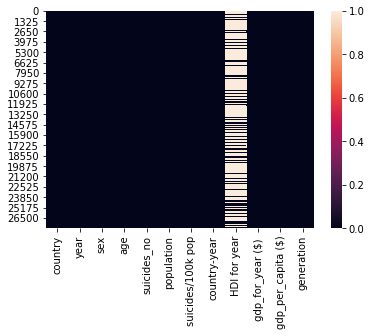

In [7]:
import seaborn as sns
sns.heatmap(df.isnull())

In [8]:
dict1={'country':[],'suicide_number':[],'Population':[]}

In [9]:
for i in range(df.shape[0]):
    if df['country'][i] not in dict1['country']:
        dict1['country'].append(df['country'][i])
        dict1['suicide_number'].append(0)
        dict1['Population'].append(0)
        

In [10]:
for i in range(df.shape[0]):
        index=dict1['country'].index(df['country'][i])
        dict1['suicide_number'][index]+=df['suicides_no'][i]
        dict1['Population'][index]+=df['population'][i]
    

# dataframe with country ,suicide_number count of each country,population

In [11]:
country_suicide_no=pd.DataFrame.from_dict(dict1, orient='columns')

# Replacing naans of the hdi column

In [12]:
countries=np.array(country_suicide_no['country']).tolist()
type(countries)

list

In [13]:
HDI_countries_mean={}

In [14]:
for i in range(len(countries)):
    HDI_countries_mean[countries[i]]=(df[df['country']==countries[i]]['HDI for year']).mean()
HDI_countries_mean
    
for i in range(len(countries)):
    mask=df['country']==countries[i]
    mean=df.loc[mask,'HDI for year'].mean()
    df.loc[mask,'HDI for year']=df.loc[mask,'HDI for year'].fillna(mean)

In [15]:
df.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year          1486
 gdp_for_year ($)        0
gdp_per_capita ($)       0
generation               0
dtype: int64

In [16]:
new_df=df.dropna()

In [17]:
df=df.dropna()

In [18]:
new_df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

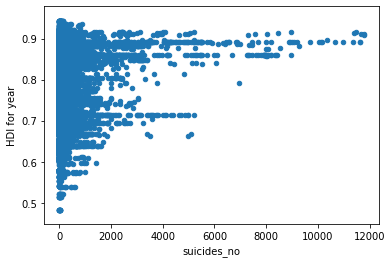

In [19]:
new_df.plot(x='suicides_no',y='HDI for year',kind="scatter")

In [20]:
#df=df[df['suicides_no'] < 4000]

In [21]:
corr=df.corr()

In [22]:
import seaborn as sns

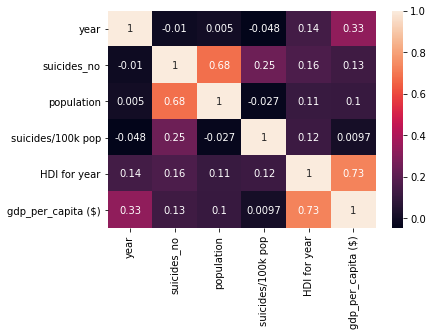

In [23]:
sns.heatmap(corr,annot=True)

In [24]:
df.shape

(26334, 12)

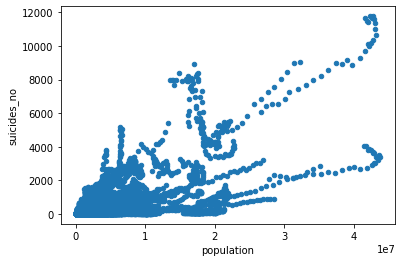

In [25]:
df.plot.scatter('population','suicides_no')



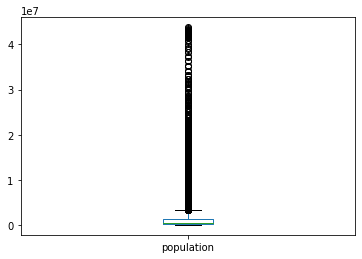

In [26]:
df['population'].plot(kind='box')

In [27]:
df.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.010160,0.004961,-0.047593,0.138215,0.332716
suicides_no,-0.010160,1.000000,0.683431,0.245930,0.163470,0.125036
population,0.004961,0.683431,1.000000,-0.027322,0.109122,0.104276
suicides/100k pop,-0.047593,0.245930,-0.027322,1.000000,0.116266,0.009738
HDI for year,0.138215,0.163470,0.109122,0.116266,1.000000,0.727812
gdp_per_capita ($),0.332716,0.125036,0.104276,0.009738,0.727812,1.000000


# checking if any collinearity between columns

In [28]:
df=df.rename(columns={' gdp_for_year ($) ':'gdp_for_year','gdp_per_capita ($)':'gdp_per_capita'})
new_df=new_df.rename(columns={' gdp_for_year ($) ':'gdp_for_year','gdp_per_capita ($)':'gdp_per_capita'})

In [29]:
df['gdp_for_year']=df['gdp_for_year'].str.replace(",","").astype(np.float64)
new_df['gdp_for_year']=new_df['gdp_for_year'].str.replace(",","").astype(np.float64)

In [30]:
def correlation(df,threshold):
    col_corr=set()
    corr_matrix=df.corr();
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i,j])>threshold):
                col_corr.add(corr_matrix.columns[i])
    return col_corr
        
    

In [31]:
extra_columns=correlation(new_df,0.7)

In [32]:
extra_columns

{'gdp_for_year', 'gdp_per_capita'}

# Their exists collinearity between gdp_per_captia, HDI for year and gdp_for_year,HDI for year

In [33]:
new_df=new_df.drop(['gdp_per_capita','gdp_for_year'],axis=1)

In [34]:
extra_columns=correlation(new_df,0.7)

In [35]:
extra_columns

set()

# removed all columns which are causing multicollinearity

In [36]:
df.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita
year,1.000000,-0.010160,0.004961,-0.047593,0.138215,0.087856,0.332716
suicides_no,-0.010160,1.000000,0.683431,0.245930,0.163470,0.589714,0.125036
population,0.004961,0.683431,1.000000,-0.027322,0.109122,0.739747,0.104276
suicides/100k pop,-0.047593,0.245930,-0.027322,1.000000,0.116266,0.019304,0.009738
HDI for year,0.138215,0.163470,0.109122,0.116266,1.000000,0.298936,0.727812
gdp_for_year,0.087856,0.589714,0.739747,0.019304,0.298936,1.000000,0.306781
gdp_per_capita,0.332716,0.125036,0.104276,0.009738,0.727812,0.306781,1.000000


In [37]:
temp_df=df

In [38]:
temp_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.673,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.673,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.673,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.673,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.673,2.156625e+09,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,0.673,2.156625e+09,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,0.673,2.156625e+09,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,0.673,2.156625e+09,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,0.673,2.156625e+09,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,0.673,2.156625e+09,796,Generation X


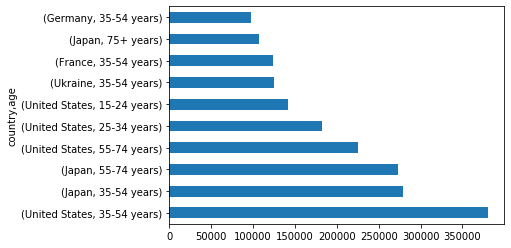

In [39]:
temp_df.groupby(['country','age']).suicides_no.sum().nlargest(10).plot(kind='barh')

# Russian federation with age group of 35-54 is highest

In [40]:
from numpy import median

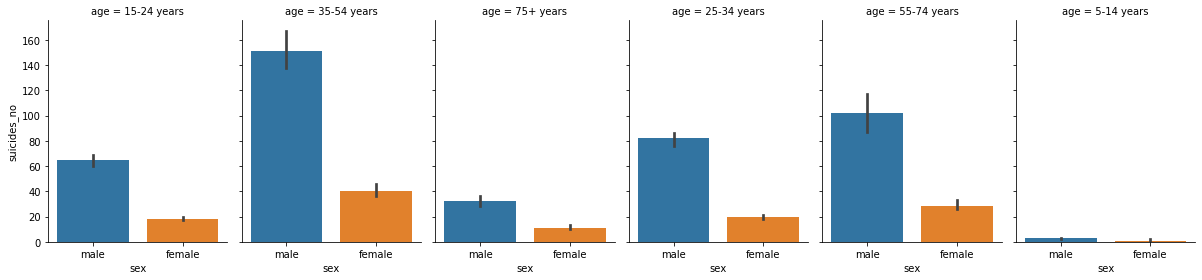

In [41]:
ax = sns.catplot(x="sex", y="suicides_no",col='age', data=df, estimator=median,height=4, aspect=.7,kind='bar')

In [42]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.673,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.673,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.673,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.673,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.673,2.156625e+09,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,0.673,2.156625e+09,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,0.673,2.156625e+09,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,0.673,2.156625e+09,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,0.673,2.156625e+09,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,0.673,2.156625e+09,796,Generation X


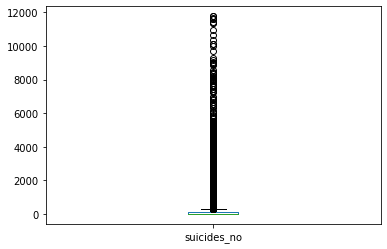

In [43]:
df['suicides_no'].plot(kind='box')

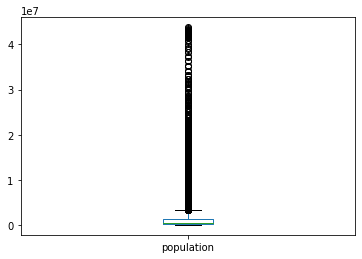

In [44]:
df['population'].plot(kind='box')

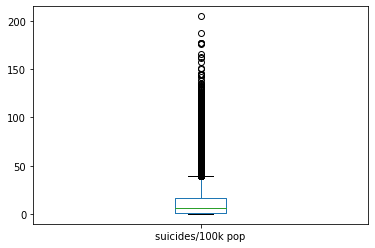

In [45]:
df['suicides/100k pop'].plot(kind='box')

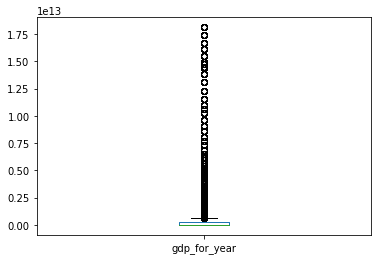

In [46]:
df['gdp_for_year'].plot(kind='box')

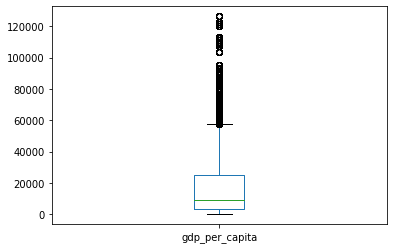

In [47]:
df['gdp_per_capita'].plot(kind='box')

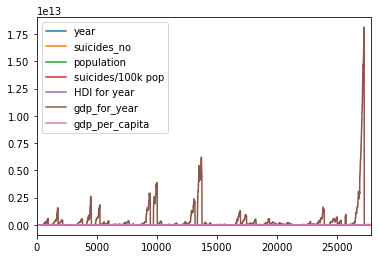

In [48]:
df.plot()


In [49]:
df['population'].head()

0    312900
1    308000
2    289700
3     21800
4    274300
Name: population, dtype: int64

In [50]:
df.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [51]:
df['gdp_for_year'].head()

0    2.156625e+09
1    2.156625e+09
2    2.156625e+09
3    2.156625e+09
4    2.156625e+09
Name: gdp_for_year, dtype: float64

In [52]:
df['population'].head()

0    312900
1    308000
2    289700
3     21800
4    274300
Name: population, dtype: int64

In [53]:
df['gdp_per_capita'].head()

0    796
1    796
2    796
3    796
4    796
Name: gdp_per_capita, dtype: int64

In [54]:
# gdp_per_captia=df['gdp_for_year']/df['population']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018708CD81D0>,
      dtype=object)

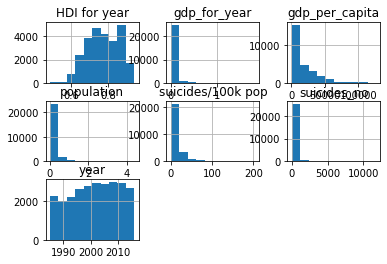

In [55]:

df.hist()

In [56]:
from numpy import sum

In [57]:

dup_data=new_df[new_df['year']==1988]

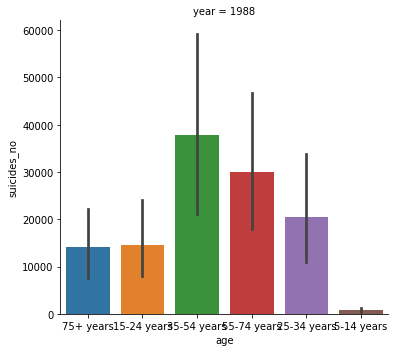

In [58]:
sns.catplot('age','suicides_no',col='year',data=dup_data,kind='bar',col_wrap=3,estimator=sum)

# In almost all years people with age group 35-54 commite more suicides

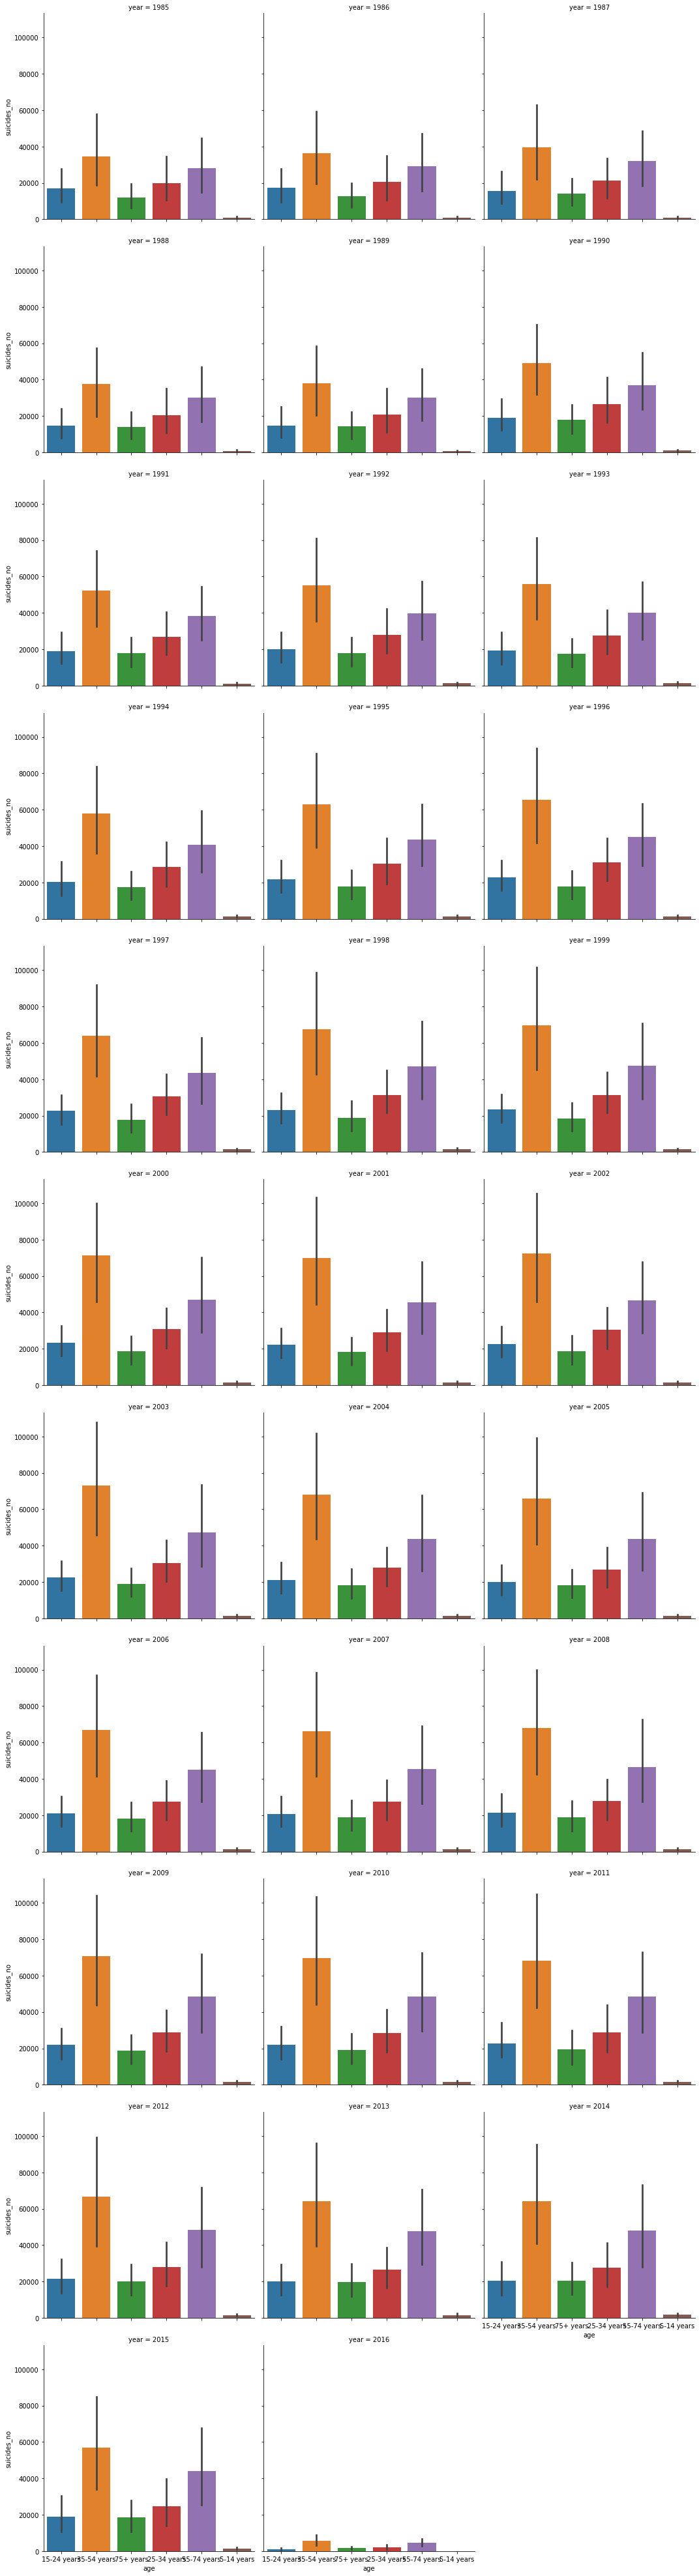

In [59]:
sns.catplot('age','suicides_no',col='year',data=new_df,kind='bar',col_wrap=3,estimator=sum)


### plot for categorical data(types:scatter,barplot,etc..)
### sns.catplot(x="generation", y="suicides_no", kind="bar", data=df)

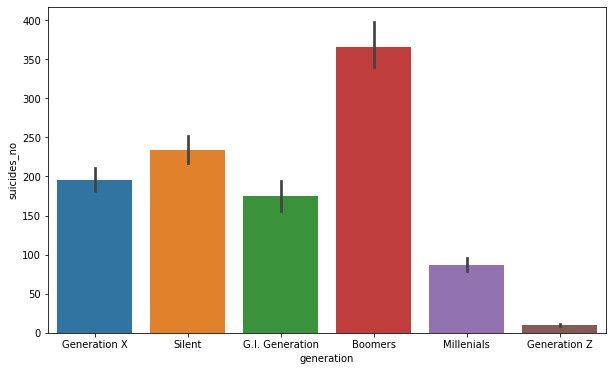

In [60]:

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="generation",y="suicides_no",data=new_df,ax=ax)


# we can observe suicide count of boomers is more than than all generations


In [61]:
df['age']

0        15-24 years
1        35-54 years
2        15-24 years
3          75+ years
4        25-34 years
5          75+ years
6        35-54 years
7        25-34 years
8        55-74 years
9         5-14 years
10       55-74 years
11        5-14 years
12         75+ years
13       15-24 years
14         75+ years
15       35-54 years
16       55-74 years
17       15-24 years
18       55-74 years
19       25-34 years
20       25-34 years
21       35-54 years
22        5-14 years
23        5-14 years
24         75+ years
25       25-34 years
26       35-54 years
27       55-74 years
28       15-24 years
29       35-54 years
            ...     
27790    25-34 years
27791    35-54 years
27792     5-14 years
27793    55-74 years
27794      75+ years
27795     5-14 years
27796    35-54 years
27797    25-34 years
27798    15-24 years
27799    15-24 years
27800    55-74 years
27801      75+ years
27802    25-34 years
27803    35-54 years
27804      75+ years
27805     5-14 years
27806    55-7

In [62]:
df['age'].replace({'5-14 years':1,'15-24 years':2,'25-34 years':3,'35-54 years':4,'55-74 years':5,'75+ years':6},inplace=True)
new_df['age'].replace({'5-14 years':1,'15-24 years':2,'25-34 years':3,'35-54 years':4,'55-74 years':5,'75+ years':6},inplace=True)

In [63]:
new_df['age']

0        2
1        4
2        2
3        6
4        3
5        6
6        4
7        3
8        5
9        1
10       5
11       1
12       6
13       2
14       6
15       4
16       5
17       2
18       5
19       3
20       3
21       4
22       1
23       1
24       6
25       3
26       4
27       5
28       2
29       4
        ..
27790    3
27791    4
27792    1
27793    5
27794    6
27795    1
27796    4
27797    3
27798    2
27799    2
27800    5
27801    6
27802    3
27803    4
27804    6
27805    1
27806    5
27807    1
27808    4
27809    3
27810    2
27811    5
27812    2
27813    6
27814    3
27815    4
27816    6
27817    1
27818    1
27819    5
Name: age, Length: 26334, dtype: int64

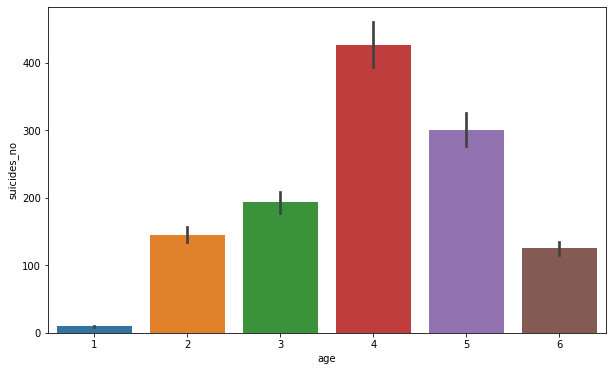

In [64]:


fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="age",y="suicides_no",data=df,ax=ax)

# averege aged(35+) people death is more

In [65]:
df['generation']

0           Generation X
1                 Silent
2           Generation X
3        G.I. Generation
4                Boomers
5        G.I. Generation
6                 Silent
7                Boomers
8        G.I. Generation
9           Generation X
10       G.I. Generation
11          Generation X
12       G.I. Generation
13          Generation X
14       G.I. Generation
15                Silent
16       G.I. Generation
17          Generation X
18       G.I. Generation
19               Boomers
20               Boomers
21                Silent
22          Generation X
23          Generation X
24       G.I. Generation
25               Boomers
26                Silent
27       G.I. Generation
28          Generation X
29                Silent
              ...       
27790         Millenials
27791       Generation X
27792       Generation Z
27793            Boomers
27794             Silent
27795       Generation Z
27796       Generation X
27797         Millenials
27798         Millenials


In [66]:
df['sex']=df['sex'].replace({'male':1,'female':0})

# barplot shows that male suicides_no is more compared female

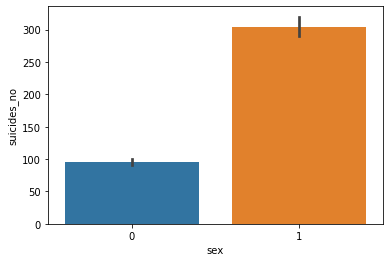

In [67]:
sns.barplot(x='sex',y='suicides_no',data=df)

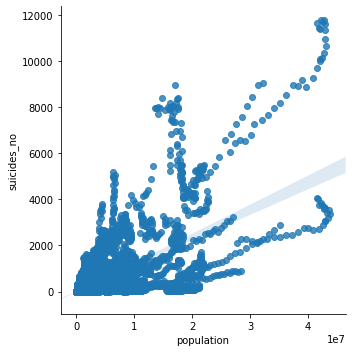

In [68]:
sns.lmplot(x='population',y='suicides_no',data=df)

In [69]:
df.dtypes

country               object
year                   int64
sex                    int64
age                    int64
suicides_no            int64
population             int64
suicides/100k pop    float64
country-year          object
HDI for year         float64
gdp_for_year         float64
gdp_per_capita         int64
generation            object
dtype: object

In [70]:
df.shape

(26334, 12)

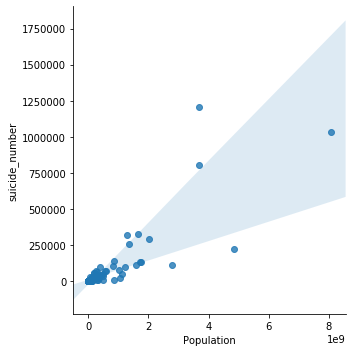

In [71]:
sns.lmplot(x='Population',y='suicide_number',data=country_suicide_no)

In [72]:
country_suicide_no.columns

Index(['country', 'suicide_number', 'Population'], dtype='object')

In [73]:
country_suicide_no['suicide_rates']=country_suicide_no.suicide_number/country_suicide_no.Population

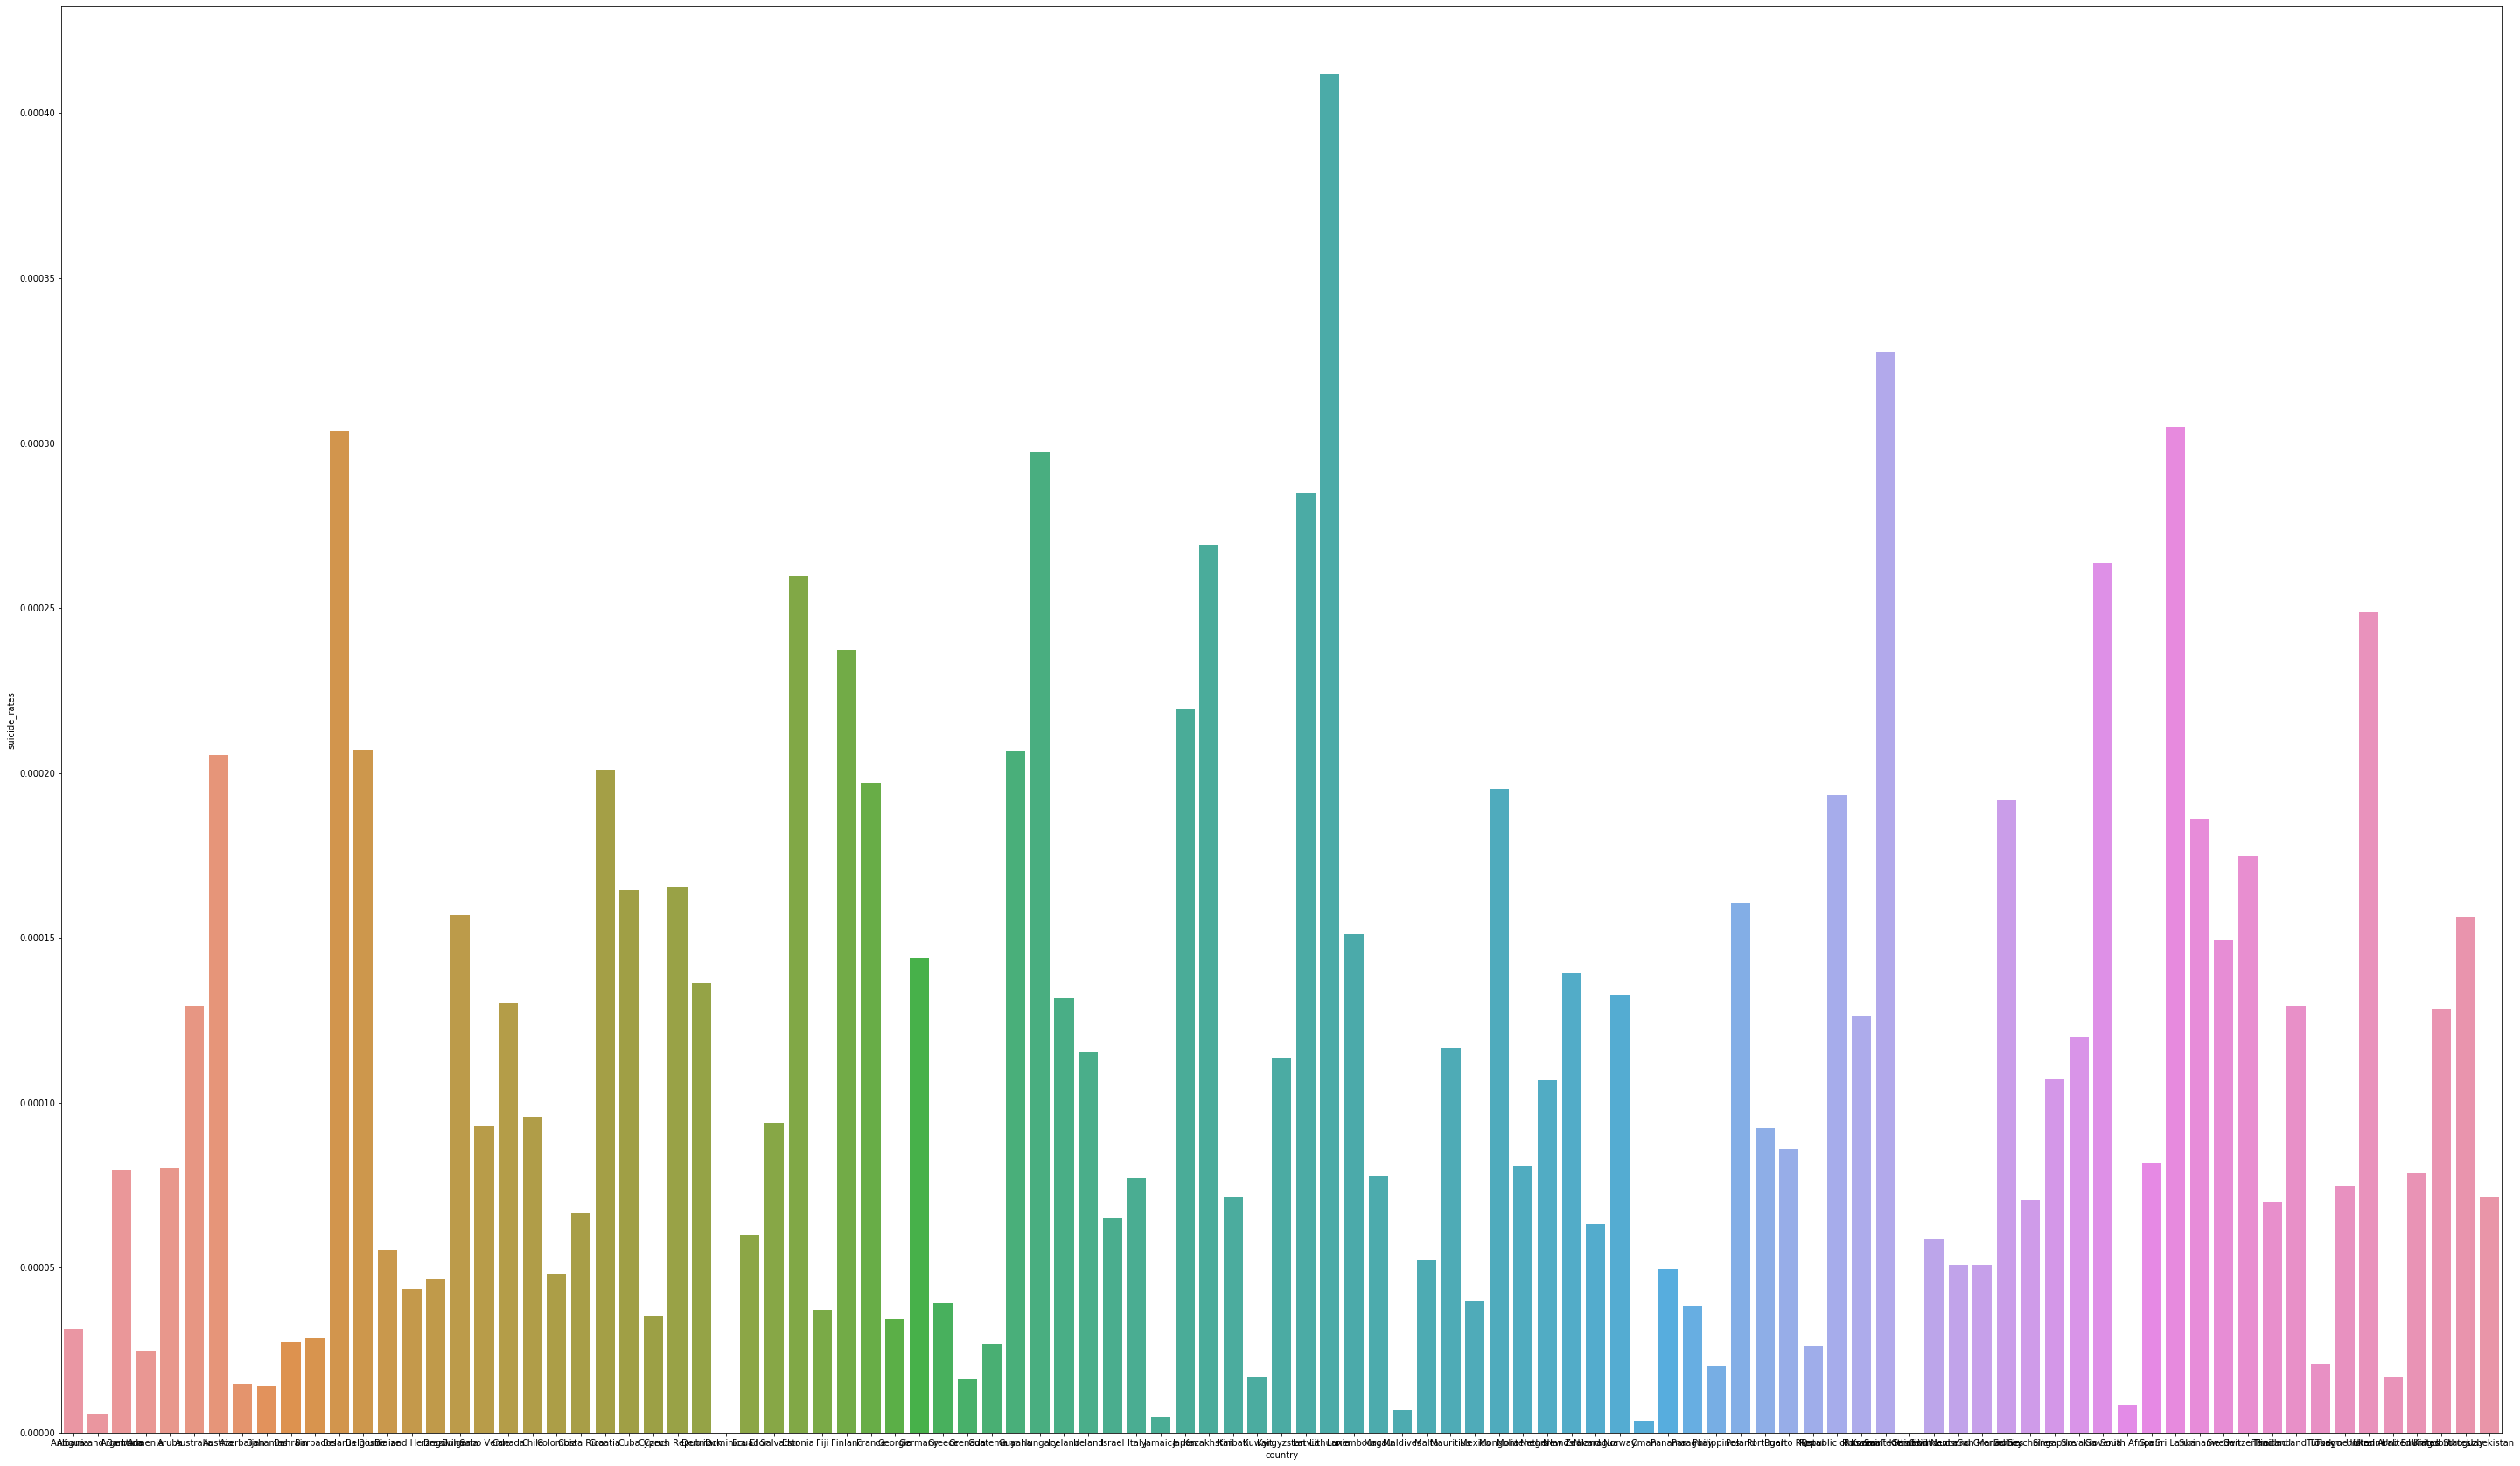

In [74]:
fig_dims = (50, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="country",y="suicide_rates",data=country_suicide_no,ax=ax)

# 10 countries with more suicide rates

In [75]:
top_10=country_suicide_no.nlargest(10,"suicide_number")
top_10

,country,suicide_number,Population,suicide_rates
75,Russian Federation,1209742,3690802620,0.000328
98,United States,1034013,8054027201,0.000128
46,Japan,806902,3681024844,0.000219
33,France,329127,1670756775,0.000197
95,Ukraine,319950,1286469184,0.000249
35,Germany,291262,2024875612,0.000144
73,Republic of Korea,261730,1354944936,0.000193
15,Brazil,226613,4856093548,0.000047
69,Poland,139098,866180029,0.000161
97,United Kingdom,136805,1738767780,0.000079


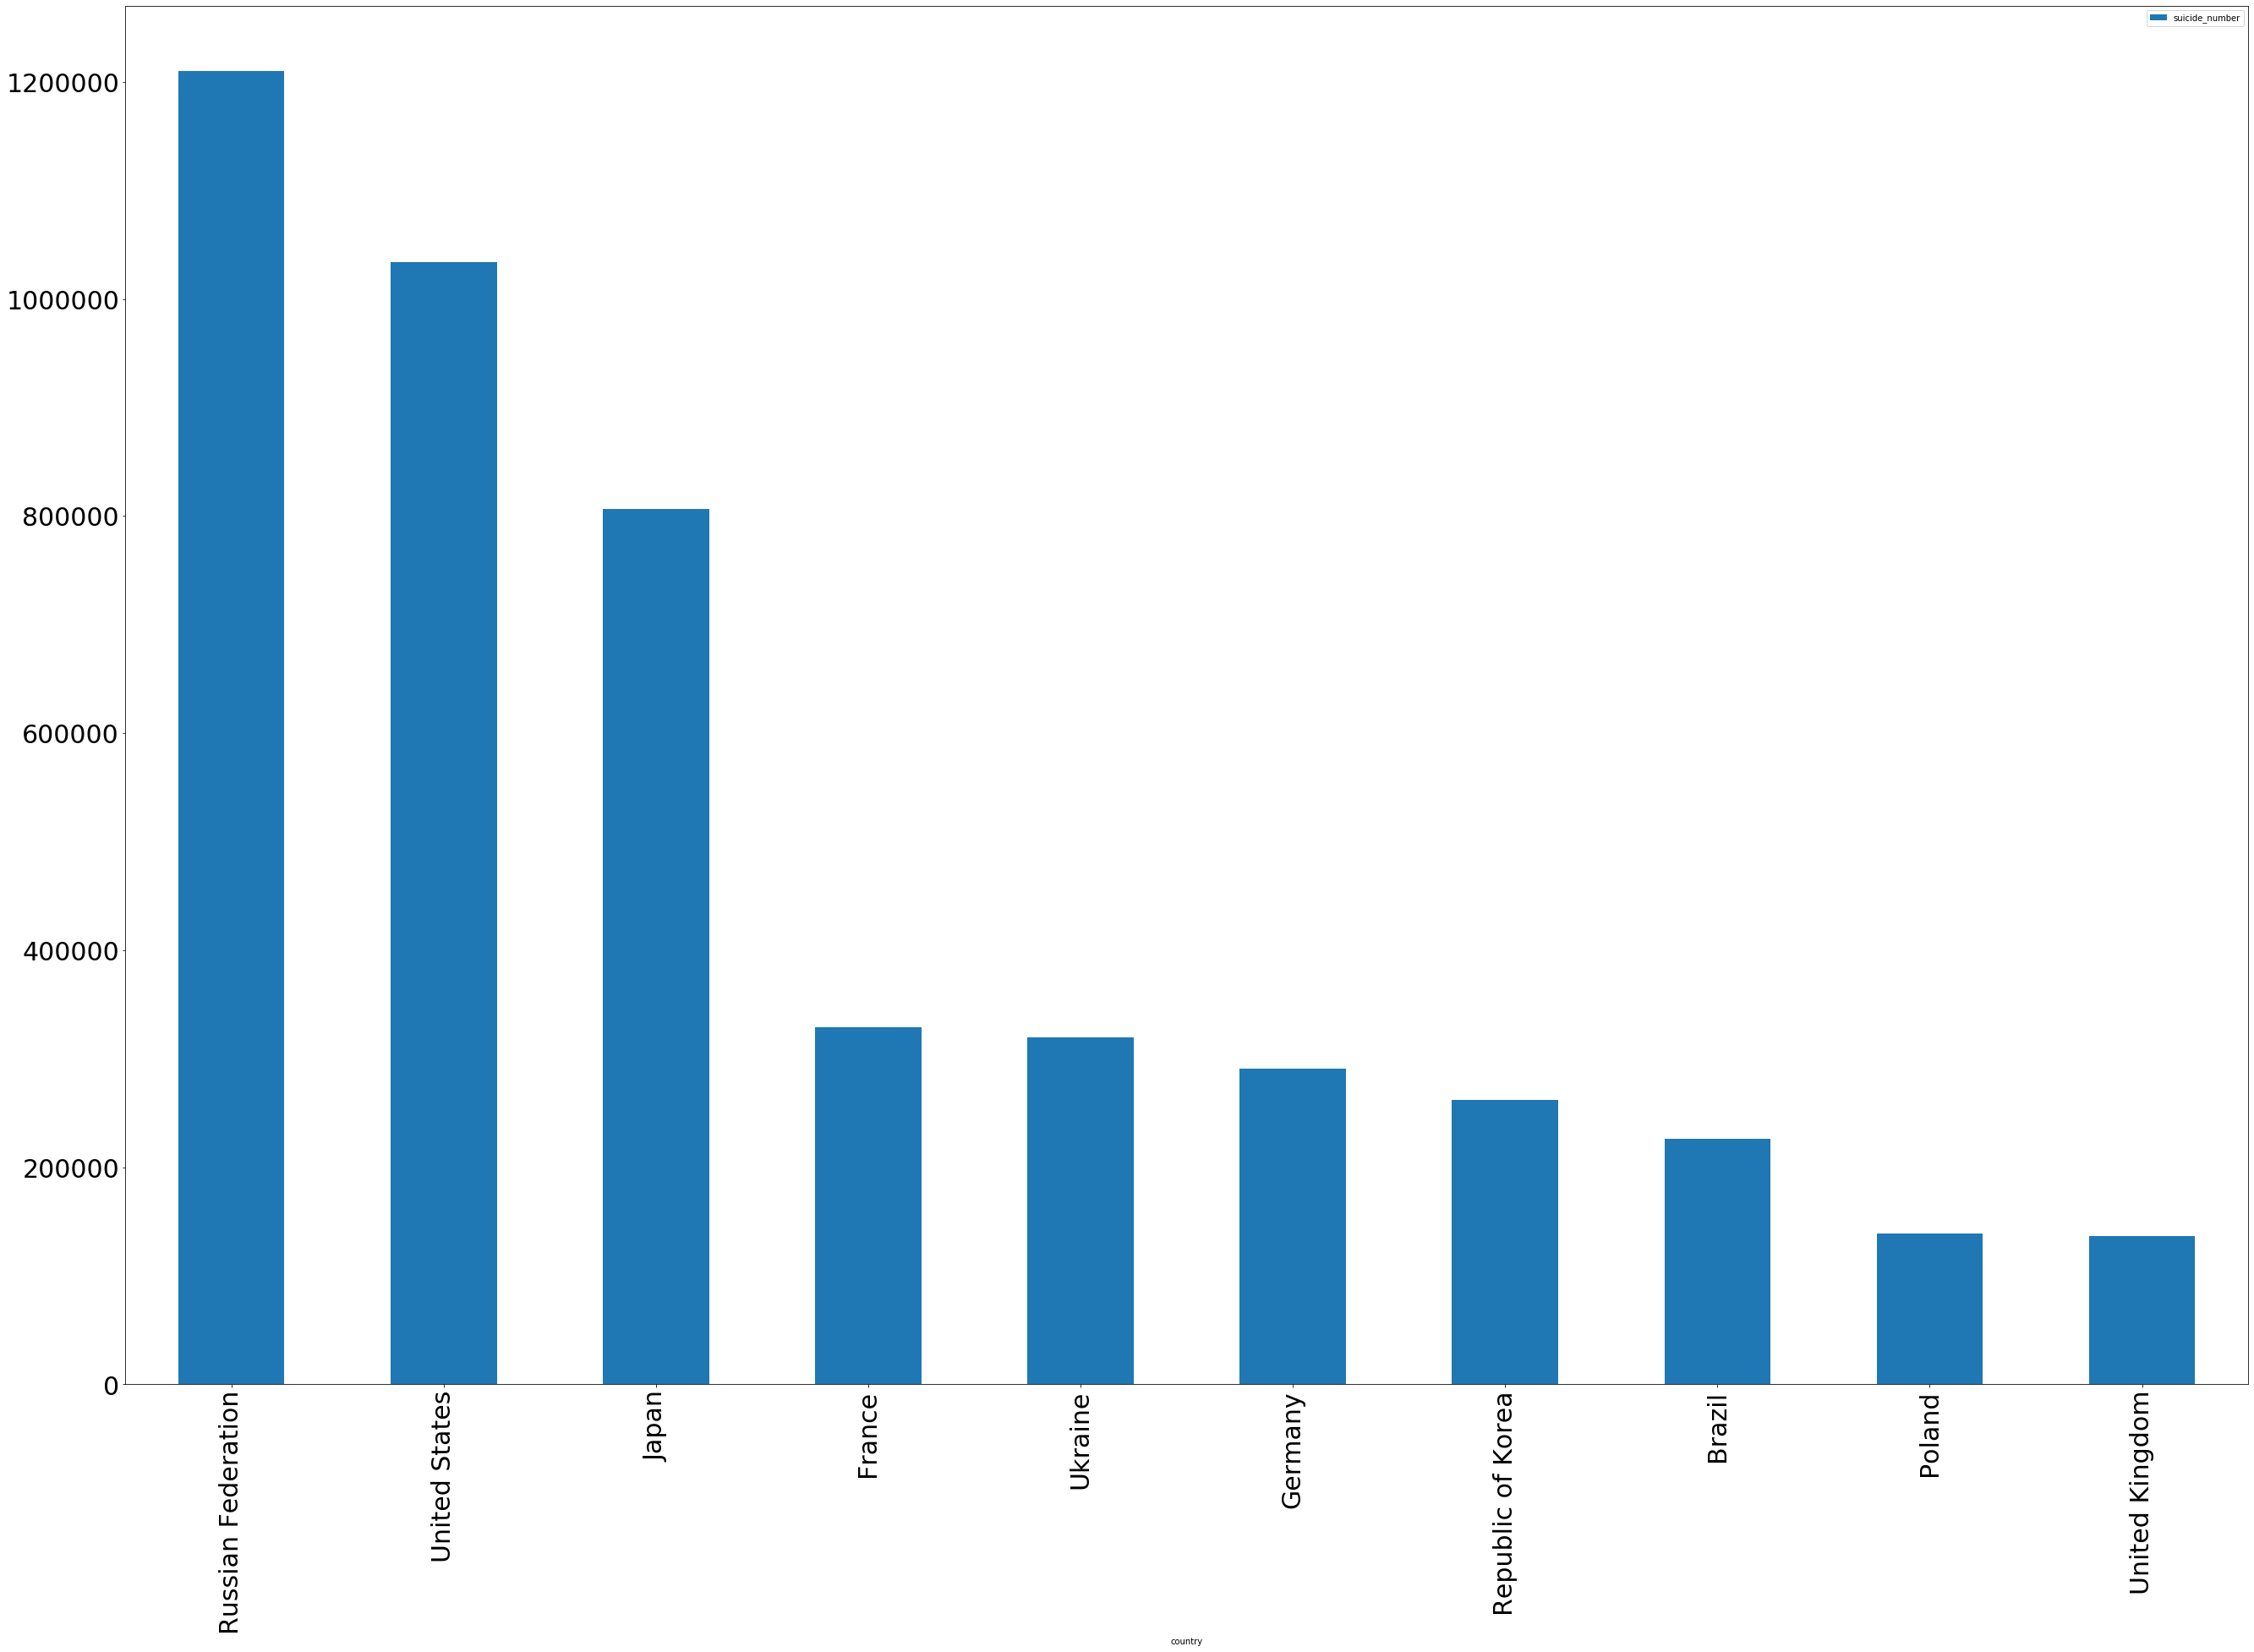

In [76]:
top_10.plot(kind="bar",x="country",y="suicide_number",fontsize=30,figsize=(45,30))

In [77]:
new_df.to_csv("preprocessed.csv",index=False)

# Linear Regression

# Reading preprocessed dataframe

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
df=pd.read_csv('preprocessed.csv')

In [80]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,generation
0,Albania,1987,male,2,21,312900,6.71,Albania1987,0.673,Generation X
1,Albania,1987,male,4,16,308000,5.19,Albania1987,0.673,Silent
2,Albania,1987,female,2,14,289700,4.83,Albania1987,0.673,Generation X
3,Albania,1987,male,6,1,21800,4.59,Albania1987,0.673,G.I. Generation
4,Albania,1987,male,3,9,274300,3.28,Albania1987,0.673,Boomers
5,Albania,1987,female,6,1,35600,2.81,Albania1987,0.673,G.I. Generation
6,Albania,1987,female,4,6,278800,2.15,Albania1987,0.673,Silent
7,Albania,1987,female,3,4,257200,1.56,Albania1987,0.673,Boomers
8,Albania,1987,male,5,1,137500,0.73,Albania1987,0.673,G.I. Generation
9,Albania,1987,female,1,0,311000,0.00,Albania1987,0.673,Generation X


In [81]:
df.dtypes

country               object
year                   int64
sex                   object
age                    int64
suicides_no            int64
population             int64
suicides/100k pop    float64
country-year          object
HDI for year         float64
generation            object
dtype: object

# getting rid of outliers

In [82]:
df=df[df['suicides_no'] < 4000]

In [83]:
y=df[['suicides_no']]

In [84]:
x=df[['population']]

In [85]:
y.shape

(26159, 1)

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
regres=LinearRegression()

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [90]:
regres.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
regres.score(x_train,y_train)

0.3876032083085371

In [92]:
y_pred_train=regres.predict(x_train);

In [93]:
regres.coef_

array([[7.26952059e-05]])

In [94]:
regres.score(x_test,y_test)

0.3474678929662559

# above correlation b/w pop and suicide number is spurious correlation

# multilinear regression

# droping duplicate and unwanted columns

In [95]:
df=df.drop(['country-year','generation','suicides/100k pop','country'],axis=1)

In [96]:
df.dtypes

year              int64
sex              object
age               int64
suicides_no       int64
population        int64
HDI for year    float64
dtype: object

In [97]:
df

,year,sex,age,suicides_no,population,HDI for year
0,1987,male,2,21,312900,0.673
1,1987,male,4,16,308000,0.673
2,1987,female,2,14,289700,0.673
3,1987,male,6,1,21800,0.673
4,1987,male,3,9,274300,0.673
5,1987,female,6,1,35600,0.673
6,1987,female,4,6,278800,0.673
7,1987,female,3,4,257200,0.673
8,1987,male,5,1,137500,0.673
9,1987,female,1,0,311000,0.673


In [98]:
df['sex'].replace({'male':1,'female':0},inplace=True)

In [99]:
df.dtypes

year              int64
sex               int64
age               int64
suicides_no       int64
population        int64
HDI for year    float64
dtype: object

# transformation

In [100]:
from sklearn import preprocessing
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=['year', 'sex', 'age', 'suicides_no', 'population',
       'HDI for year'])

In [101]:
x=df.drop(['suicides_no'],axis=1)

In [102]:
y=df[['suicides_no']]

In [103]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [104]:
multiregres=LinearRegression()

In [105]:
multiregres.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
import  matplotlib.pyplot as plt


In [107]:
multiregres.score(x_train,y_train)

0.45306746666246434

In [108]:
multiregres.score(x_test,y_test)

0.4814635238736379

In [109]:
from sklearn.metrics import mean_squared_error

In [110]:
y_pred=multiregres.predict(x_test)

In [111]:
x_test.shape


(5232, 5)

In [112]:
x_test


,year,sex,age,population,HDI for year
10383,0.677419,0.0,0.2,0.000265,0.560954
5719,0.677419,0.0,1.0,0.011687,0.406291
13109,0.612903,1.0,0.6,0.006816,0.472162
14586,0.774194,0.0,0.8,0.006424,0.653471
14665,0.322581,1.0,1.0,0.001068,0.472885
190,0.612903,0.0,0.0,0.006535,0.412148
13017,0.129032,0.0,0.4,0.004304,0.472162
24366,0.548387,0.0,1.0,0.001007,0.420390
732,0.387097,1.0,1.0,0.011180,0.643384
21358,0.548387,0.0,0.4,0.009258,0.704059


In [113]:
plot_x=x_test.iloc[:30,3:4]
plot_y=y_test.iloc[:30,:]

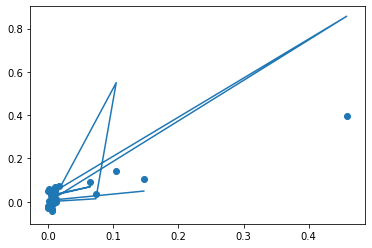

In [114]:
plt.plot(plot_x,plot_y)
plt.scatter(plot_x,y_pred[:30])

In [115]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.07390389052501047

# knn regressor

In [116]:
df.isnull().sum()

year            0
sex             0
age             0
suicides_no     0
population      0
HDI for year    0
dtype: int64

In [117]:
df.shape

(26159, 6)

In [118]:
df=df[df['suicides_no']!=0]

In [119]:
df.shape

(22213, 6)

In [120]:
df

,year,sex,age,suicides_no,population,HDI for year
0,0.064516,1.0,0.2,0.005257,0.007133,0.412148
1,0.064516,1.0,0.6,0.004005,0.007022,0.412148
2,0.064516,0.0,0.2,0.003504,0.006604,0.412148
3,0.064516,1.0,1.0,0.000250,0.000488,0.412148
4,0.064516,1.0,0.4,0.002253,0.006252,0.412148
5,0.064516,0.0,1.0,0.000250,0.000803,0.412148
6,0.064516,0.0,0.6,0.001502,0.006355,0.412148
7,0.064516,0.0,0.4,0.001001,0.005862,0.412148
8,0.064516,1.0,0.8,0.000250,0.003129,0.412148
12,0.096774,0.0,1.0,0.000501,0.000821,0.412148


In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [122]:
from sklearn import neighbors

In [123]:
model = neighbors.KNeighborsRegressor(n_neighbors = 23)
model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                    weights='uniform')

In [124]:
model.score(x_train,y_train)

0.6825668123010591

In [125]:
y_pred_train=model.predict(x_train)

In [126]:
model.score(x_test,y_test)

0.6413144604063064

In [127]:
knn_y_pred_test=model.predict(x_test)

In [128]:
np.sqrt(mean_squared_error(y_test,knn_y_pred_test))

0.058208612660336945

# Decision Tree Regressor

In [129]:
from sklearn.tree import DecisionTreeRegressor

In [130]:
decision_tree_regressor=DecisionTreeRegressor()

In [131]:
decision_tree_regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [132]:
decision_tree_regressor.score(x_train,y_train)

0.9999974869565251

In [133]:
decision_tree_regressor.score(x_test,y_test)

0.8812560117307893

In [134]:
decision_pred=decision_tree_regressor.predict(x_test)

In [135]:
np.sqrt(mean_squared_error(y_test,decision_pred))

0.033491618072473694

# Random forest Regressor

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
random=RandomForestRegressor(n_estimators=30)

In [138]:
random.fit(x_train,y_train)

C:\Users\Rajesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [139]:
random.score(x_train,y_train)

0.9903364589667801

In [140]:
random.score(x_test,y_test)

0.9240233544816738

In [141]:
random_pred=random.predict(x_test)

In [142]:
np.sqrt(mean_squared_error(y_test,random_pred))

0.026789855536243985

# GDP pedict